# SVM classifier for baseline results- Split by Gender

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import sklearn as sk


%matplotlib inline

## Setup dataframe with clip labeling by gender & emotion

In [2]:
audio_data = np.load("audio_data.npy")
labels = np.load("wav_labels.npy")

# labels: modality-vocal channel-emotion-emotional intensity-statement-repetition-actor
# emotions: 01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised
# odd number actors = male, even = female

# 1440 files: 24 speakers, 60 recordings per speaker
audio_data = audio_data.reshape(1440, 9480)

m_features = []
f_features = []


# classifying by emotion when segmented by gender
for i in range(1440):
    
    if (labels[i][6]%2 == 0):
        label = "Female"
    else:
        label = "Male"
        
    if (labels[i][2] == 1):
        emot = "neutral"
    elif (labels[i][2] == 2):
        emot = "calm"
    elif (labels[i][2] == 3):
        emot = "happy"
    elif (labels[i][2] == 4):
        emot = "sad"
    elif (labels[i][2] == 5):
        emot = "angry"
    elif (labels[i][2] == 6):
        emot = "fearful"
    elif (labels[i][2] == 7):
        emot = "disgust"
    elif (labels[i][2] == 8):
        emot = "surprised"
    
    if (label == "Male"):
        m_features.append([audio_data[i], label, emot])
    elif (label == "Female"):
        f_features.append([audio_data[i], label, emot])
    


    
m_feature_df = pd.DataFrame(m_features, columns = ["mfcc", "gender", "emotion"])
f_feature_df = pd.DataFrame(f_features, columns = ["mfcc", "gender", "emotion"])


m_feature_df.head()

,mfcc,gender,emotion
0,"[-855.3770751953125, -855.3770751953125, -855....",Male,neutral
1,"[-850.3917236328125, -850.435791015625, -850.4...",Male,neutral
2,"[-849.78369140625, -848.8447265625, -848.56610...",Male,neutral
3,"[-842.9385375976562, -843.2474975585938, -850....",Male,neutral
4,"[-911.1758422851562, -910.4053344726562, -905....",Male,calm


In [3]:
f_feature_df.head()

,mfcc,gender,emotion
0,"[-821.495849609375, -821.495849609375, -821.49...",Female,neutral
1,"[-820.0106811523438, -820.0106811523438, -820....",Female,neutral
2,"[-782.8099365234375, -782.8099365234375, -782....",Female,neutral
3,"[-814.5337524414062, -813.1904907226562, -812....",Female,neutral
4,"[-853.9297485351562, -853.9297485351562, -853....",Female,calm


## Breakdown Dataframe and run through SVM

In [4]:
X_m = np.array(m_feature_df.mfcc.tolist())
X_f = np.array(f_feature_df.mfcc.tolist())

Y_m = np.array(m_feature_df.emotion.tolist())
Y_f = np.array(f_feature_df.emotion.tolist())

x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(X_m, Y_m, test_size=0.25, random_state=0)

X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X_f, Y_f, test_size=0.25, random_state=0)

# Standard SVM
svm_m = sk.svm.SVC()

svm_m.fit(x_train, y_train)

predictions_m = svm_m.predict(x_test)

svm_f = sk.svm.SVC()

svm_f.fit(X_train, Y_train)

predictions_f = svm_f.predict(X_test)

## Display Results: Confusion Matrices

Emotion Classification among Male Subjects
   neutral  calm  happy  sad  angry  fearful  disgust  surprised
0       10     1      4    3      0        0        0          0
1        0    20      4    0      0        0        3          0
2        3     2     14    0      0        0        0          0
3        8     3      4    3      0        0        2          2
4        8     2      5    3      0        0        4          5
5        0     8      3    0      0        0        5          0
6        1    13      7    2      0        0        2          0
7        1     2      7    7      0        0        3          6


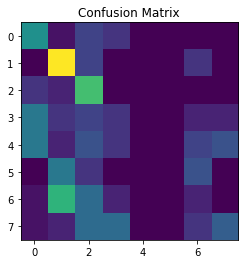

Emotion Classification among Female Subjects
   neutral  calm  happy  sad  angry  fearful  disgust  surprised
0        9     0      3    2      0        0        0          4
1        0    20      5    0      0        0        0          2
2        2     5     11    0      0        0        0          1
3        9     4      0    2      0        0        1          6
4        5     2      4    6      2        0        1          7
5        0    13      0    0      0        0        1          2
6        4    15      2    0      0        0        2          2
7        0     4      1    2      0        0        0         19


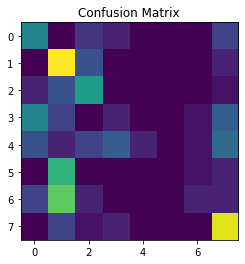

In [5]:
cm_m = sk.metrics.confusion_matrix(y_test, predictions_m)
cm_f = sk.metrics.confusion_matrix(Y_test, predictions_f)

print("Emotion Classification among Male Subjects")
df = pd.DataFrame(cm_m, columns=[Y_m[0], Y_m[4], Y_m[12], Y_m[20], Y_m[28], Y_m[36], Y_m[44], Y_m[52] ])
print(df)

plt.figure(figsize=(10,4))
plt.imshow(cm_m)
plt.title("Confusion Matrix")
plt.show()

print("Emotion Classification among Female Subjects")
df = pd.DataFrame(cm_f, columns=[Y_f[0], Y_f[4], Y_f[12], Y_f[20], Y_f[28], Y_f[36], Y_f[44], Y_f[52] ])
print(df)

plt.figure(figsize=(10,4))
plt.imshow(cm_f)
plt.title("Confusion Matrix")
plt.show()

## Precision Results

In [6]:
def precision(confmatrix):
    # precision = tp/(tp+fp)
    tp = np.diag(confmatrix)
    fp = np.sum(confmatrix, axis=0) - tp  
    precision = np.nanmean(tp/(tp+fp)) # nan issue if 0s in diag
    return precision

prec_m = precision(cm_m)

prec_f = precision(cm_f)

print("Classification by Emotion Precision in Males: " + str(prec_m))



print("Classification by Emotion Precision in Females: " + str(prec_f))

Classification by Emotion Precision in Males: 0.2899787434454867
Classification by Emotion Precision in Females: 0.43705845712948477


<ipython-input-6-6f7a8ac0b77c>:5: RuntimeWarning: invalid value encountered in true_divide
  precision = np.nanmean(tp/(tp+fp)) # nan issue if 0s in diag
